<h1> Exploratory Data Analysis </h1>
<h2> Predict rain tomorrow in Australia </h2>
<h3> Ana-Maria Melinte, Mihaela Nistor, Andrei Dumitriu (407) </h3>


# Introduction


<p>"Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.” - John Turkey, promoter of EDA, 1961</p>

<p>Any technology user today has benefited from machine learning and Artificial intelligence in general. From facial recognition, suggestions, tools improvement, optical character recognition and so on, all the way to predicting real world events, such as our case. Machine learning is a continuously developing field. Because of this, there are many considerations to keep in mind as we work with these methodologies or analyzing the impact of the process.
With the advent and increased popularity of artificial intelligence, <b>Exploratory Data Analysis</b> has become a crucial part of the process. It summarizes </p>

# Context

<p>With the recent and tragic development of the fires in Australia, this dataset and approach is more relevant than ever. In this paper we will try to answer the question of whether or not it will rain in Australia, using the available dataset which contains weather observation from numerous Australian weather stations.</p>


# <h2> Imports </h2>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from datetime import datetime
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# <h2>Useful functions </h2>


In [3]:
def printDataDimensions():
  # see the dimesnions of the data, how many features and how many observations
  featuresNo, observationsNo = data.shape
  print("featuresNo: ", observationsNo)
  print("observationsNo: ", featuresNo)

#Exploratory Data Analysis
##Dataset dimensions

In [4]:
# read_csv into data variable
data = pd.read_csv('https://raw.githubusercontent.com/AnMa12/ItWillRainCSV/master/weatherAUS.csv')
# see the dimesnions of the data, how many features and how many observations
printDataDimensions()

featuresNo:  24
observationsNo:  142193


<p> We can see that there are <b>142193 observations</b> and <b>24 features</b> in the data set.


<p>By dropping the rows where at least one element is missing, we have <b>56420</b> observations and <b>24 variables</b>.</p>



# <h3>Previewing the dataset</h3>

In [5]:
# show the data
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am      ...      Humidity3pm  \
0           W           44.0          W      ...             22.0   
1         WNW           44.0        NNW      ...             25.0   
2         WSW           46.0          W      ...             30.0   
3          NE           24.0         SE      ...             16.0   
4           W           41.0        ENE      ...             33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.0            No  
3      1.0            No  
4      0.2            No  

[5 rows x 24 columns]

# <h3> View column names </h3>

In [6]:
# show data columns
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

# <h3>View summary of the dataset</h3>

In [7]:
# helps in seeing the datatypes to consider future data prepration
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

# <h3> Check for null values </h3>

In [8]:
# check how much of the data is missing = how many cells are NaN or NULL
data_missing = data.isnull().sum()
data_missing

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# <h3> Calculate the percentage of null values </h3>

In [9]:
# check the precentage of missing data
perc_missing = round(100 * (data_missing / len(data)), 2)
perc_missing

Date              0.00
Location          0.00
MinTemp           0.45
MaxTemp           0.23
Rainfall          0.99
Evaporation      42.79
Sunshine         47.69
WindGustDir       6.56
WindGustSpeed     6.52
WindDir9am        7.04
WindDir3pm        2.66
WindSpeed9am      0.95
WindSpeed3pm      1.85
Humidity9am       1.25
Humidity3pm       2.54
Pressure9am       9.86
Pressure3pm       9.83
Cloud9am         37.74
Cloud3pm         40.15
Temp9am           0.64
Temp3pm           1.92
RainToday         0.99
RISK_MM           0.00
RainTomorrow      0.00
dtype: float64

# <h3> Dropping columns with large % of missing values. </h3>

In [10]:
# Evaporation, Sunshine,Cloud9am, and Cloud3pm is considerably missing value.
data = data.drop(['Evaporation','Sunshine', 'Cloud9am','Cloud3pm'], axis=1)

<h3> Converting categorical variable into dummy/indicator variables </h3>

In [12]:
# transform data to categorical
data = pd.get_dummies(data,columns = ['WindGustDir','WindDir9am','WindDir3pm'],drop_first=True)

In [11]:
# Print the data again to observe the change
data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No      0.0           No  
1       1010.6       1007.8     17.2     24.3        No      0.0           No  
2       1007.6       1008.7     21.0     23.2        No      0.0           No  
3       1017.6       1012.8     18.1     26.5        No      1.0           No  
4       1010.8       1006.0     17.8     29.7        No      0.2           No

# <h3> Filling in the remaining NaN values with the mean</h3>

In [13]:
data = data.fillna(data.mean())

In [14]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm       ...        \
0          20.0          24.0         71.0         22.0       ...         
1           4.0          22.0         44.0         25.0       ...         
2          19.0          26.0         38.0         30.0       ...         
3          11.0           9.0         45.0         16.0       ...         
4           7.0          20.0         82.0         33.0       ...         

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE WindDir3pm_SSE  \
0               0              0             0              0              0   
1               0              0             0              0              0   
2               0              0             0              0              0   
3               0              0             0              0              0   
4               0              1             0              0              0   

   WindDir3pm_SSW WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0               0             0             0               1               0  
1               0             0             0               0               1  
2               0             0             0               0               1  
3               0             0             0               0               0  
4               0             0             0               0               0  

[5 rows x 62 columns]

In [15]:
# see the dimesnions of the modified data, how many features and how many observations
printDataDimensions()

featuresNo:  62
observationsNo:  142193


<h3> Create three coloumns from string type 'Date' into date type: Year, Month and Date</h3>


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data.set_index('Date', inplace=True)

<p>It is given in the description that we should drop the <b>RISK_MM</b> feature variable as it can leak answers into our model </p>
<p>We also drop the <b>RainTomorrow</b> and <b>RainToday</b> because these are the columns used for prediction and regression.

In [17]:
# pentru X (adica nu dam drop din obiectul original, cand facem X-ul trebuie sa luam data fara astea) dam drop la 'RainToday', 'RISK_MM', 
# 'RainTomorrow' pentru ca astea sunt coloanele pentru predicite respectiv regresie, pe astea le vom pune una cate una eventula pentru Y
# Risk-MM can not use classification since Risk-MM leak answers to our model.
X = data.drop(columns=['RainTomorrow','RISK_MM','RainToday'])
Y = data["RainTomorrow"]
# replace No and Yes do
Y = Y.replace({'No':0, 'Yes':1})

# <h3>Plotting rainfall in time / location </h3>

Yes:  110316
No :  31877


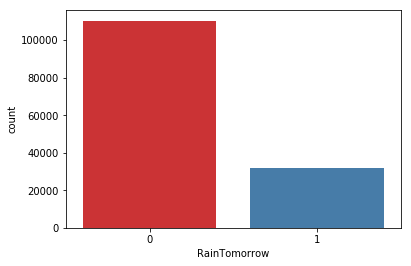

In [18]:
plot_sb = sb.countplot(Y, label='Total', palette="Set1")
yes, no = Y.value_counts()
print('Yes: ', yes)
print('No : ', no)

Text(0.5, 1.0, 'Rainfall throughout the Years')

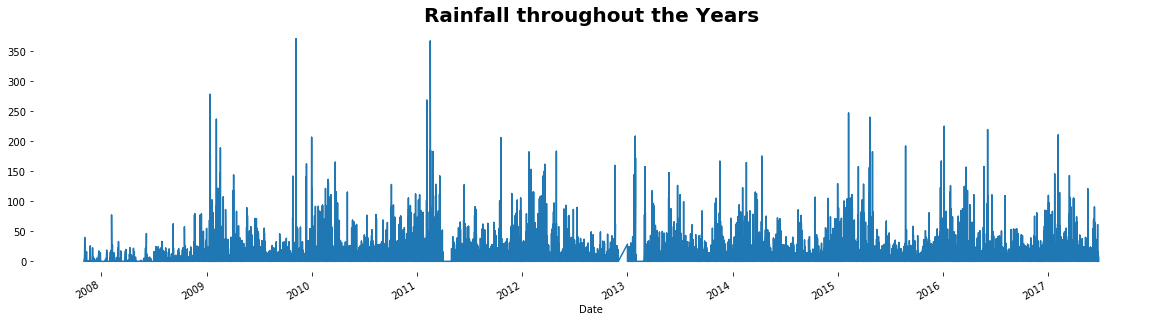

In [21]:
#Plotting the amount of Rainfall by Years
plt.figure(figsize=(20,5))
X['Rainfall'].plot()
plt.box(False)
plt.title('Rainfall throughout the Years', fontweight="bold", fontsize=20)

C:\Users\Irikos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Rainfall throughout the Months')

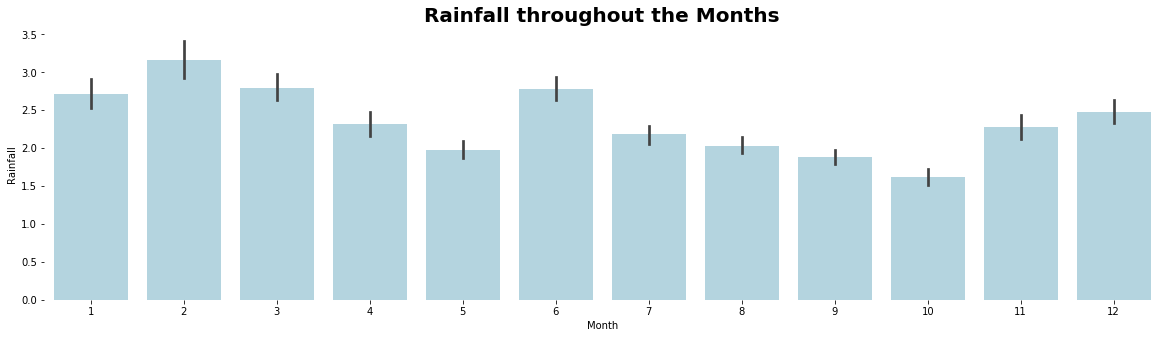

In [20]:
# Plotting the average Rainfall by Months
plt.figure(figsize=(20,5))
sb.barplot(x = 'Month', y = 'Rainfall', data = X, color = 'lightblue')
plt.box(False)
plt.title('Rainfall throughout the Months', fontweight = 'bold', fontsize = 20)

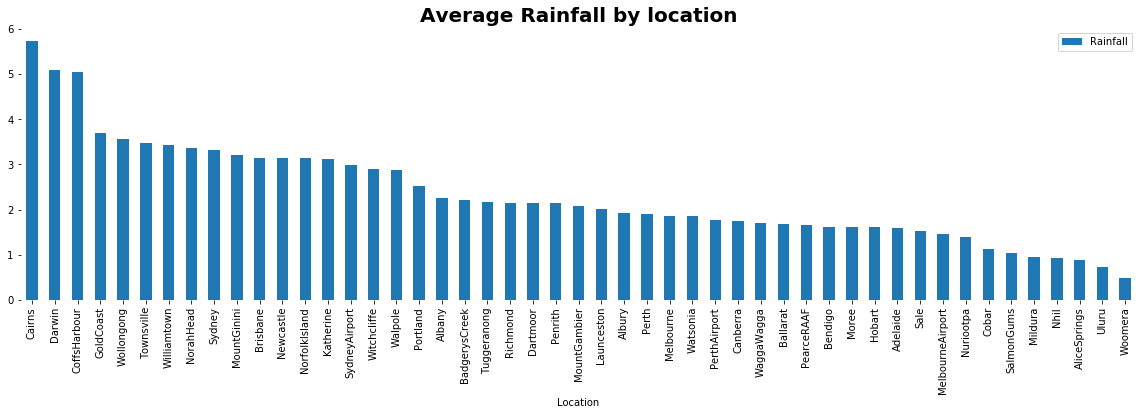

In [19]:
# Plotting the average Rainfall by Location
data_location = X.groupby('Location').agg({'Rainfall': 'mean'}).sort_values(by = 'Rainfall', ascending = False)
data_location.plot(kind = 'bar', figsize = (20, 5))
plt.box(False)
plt.title('Average Rainfall by location', fontweight = 'bold', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Maximum temperature and amount of Rainfall')

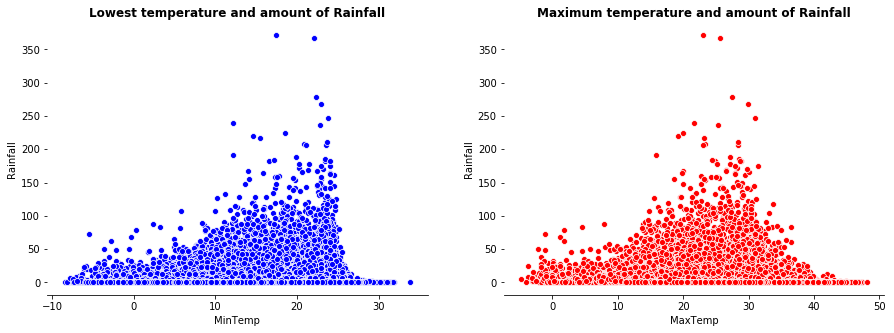

In [22]:
#Plotting the Lowest and Maximum temperature and Rainfall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sb.despine(left = True)
sb.scatterplot(x = 'MinTemp', y = 'Rainfall', data = X, ax = ax1, color = "blue")
ax1.set_title("Lowest temperature and amount of Rainfall",  fontweight = 'bold')
sb.scatterplot(x = 'MaxTemp', y = 'Rainfall', data = X, color = 'red', ax = ax2)
ax2.set_title("Maximum temperature and amount of Rainfall", fontweight = 'bold')

# <h2><b>Data preparation for ML</b></h2> 

<p> Dropping data that we do not need for the ML part </p>

In [26]:
X = X.drop(['Location', 'Year'], axis = 1)

# <h3> Correlation</h3>

In [25]:
#Creating Correlation mask > 0.5:
X_correlation = X.corr()
condition = abs(X.corr()) > 0.5

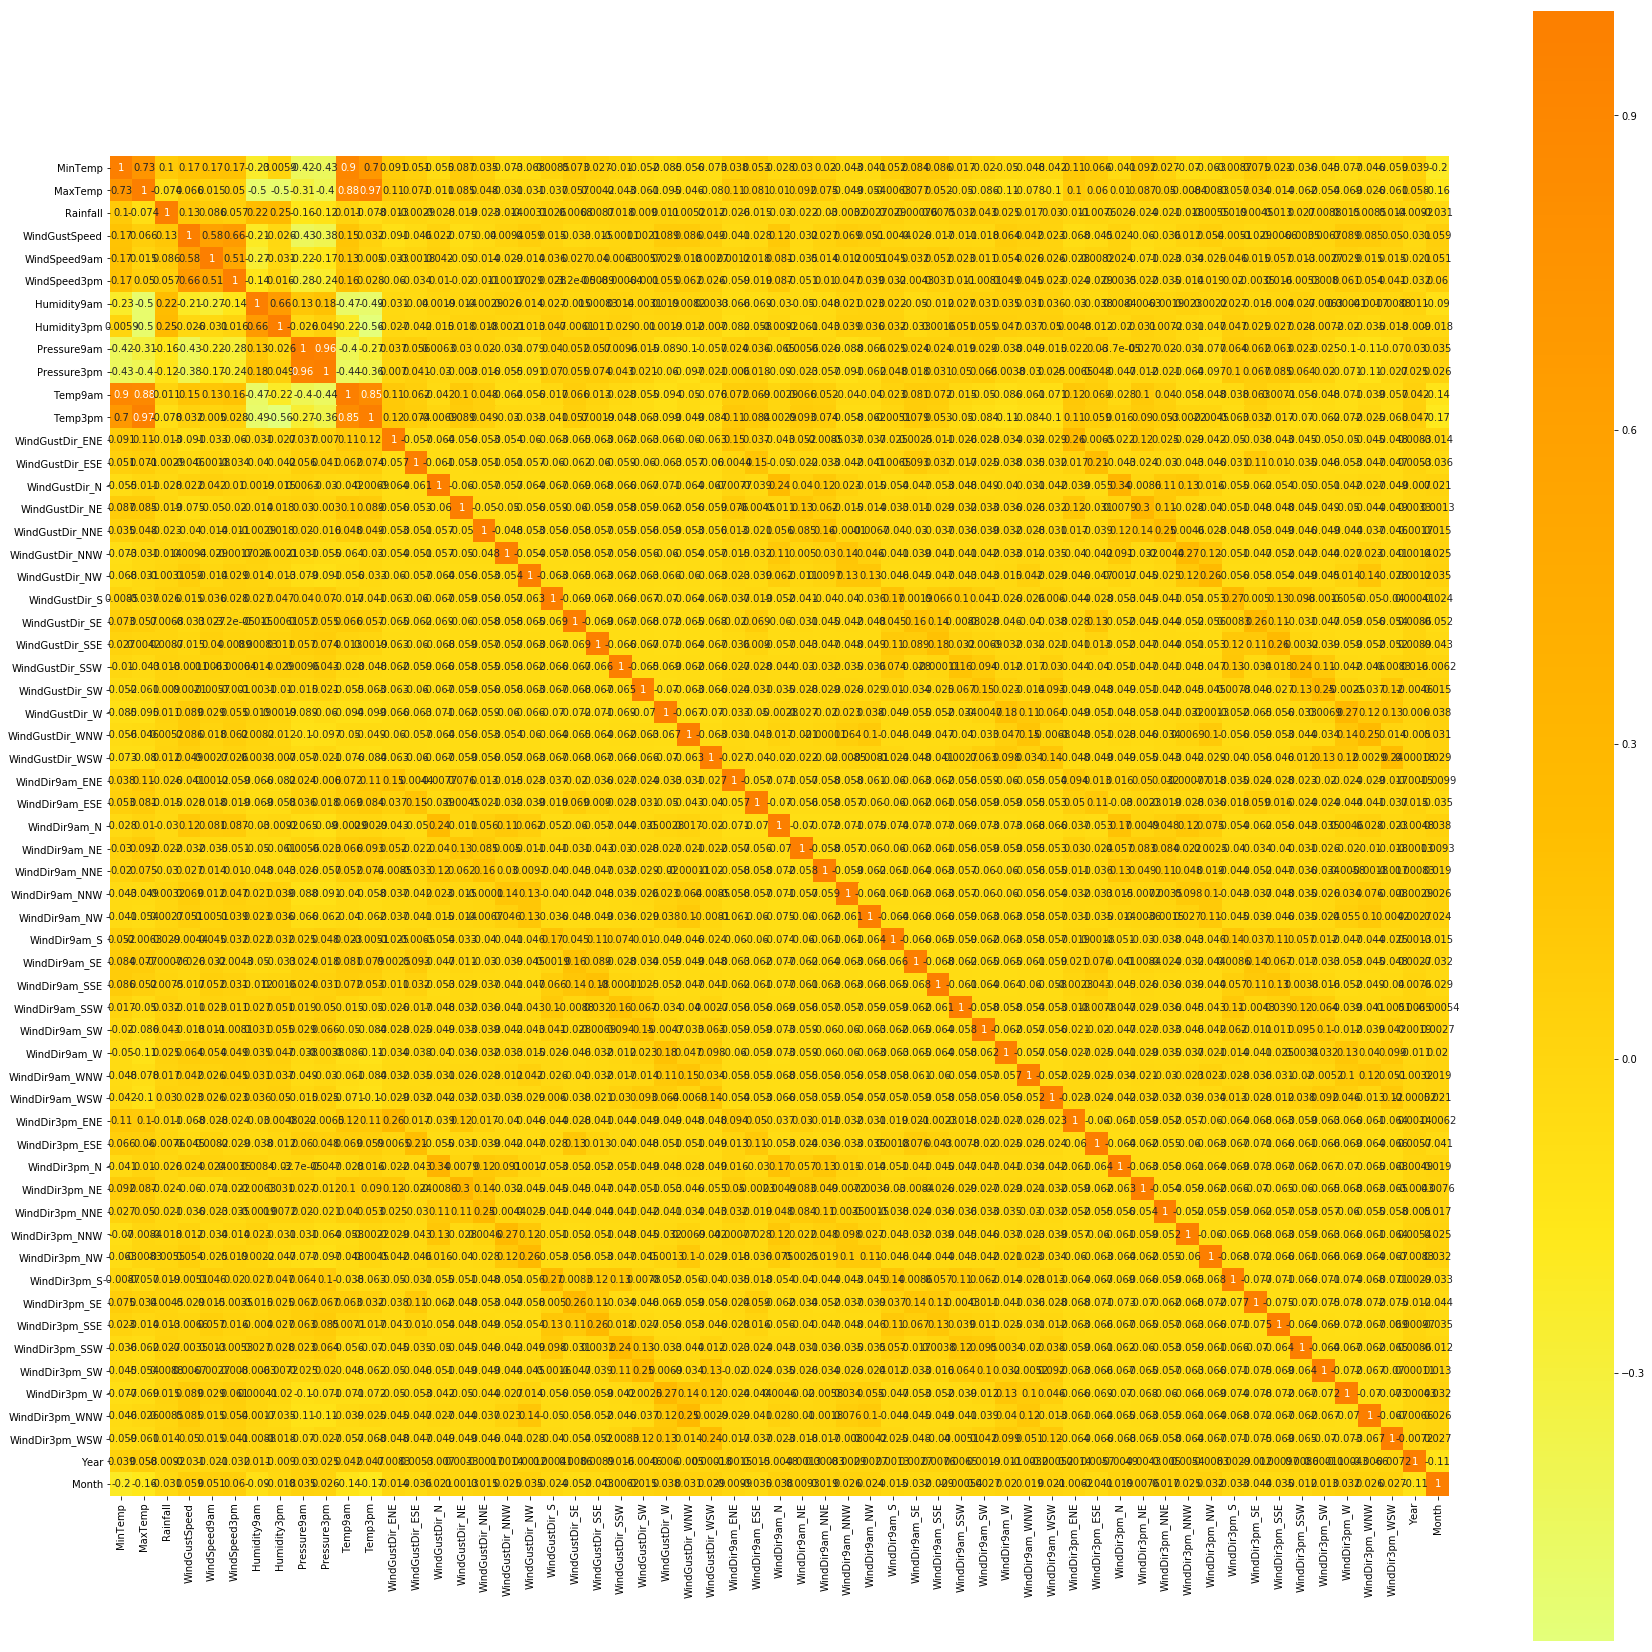

In [24]:
#heatmap correlation plot
plt.figure(figsize = (30, 30))
sb.heatmap(X.corr(), square = True, annot = True, cmap='Wistia')

<h4> <b>Interpretation</b> </h4>


*   **MinTemp** and **MaxTemp** variables are highly positively correlated (correlation coefficient = 0.74)
*   **MinTemp** and **Temp3pm** variables are also highly positively correlated (correlation coefficient = 0.71)
*   **MinTemp** and **Temp9am** variables are strongly positively correlated (correlation coefficient = 0.90)
*   **MaxTemp** and **Temp9am** variables are strongly positively correlated (correlation coefficient = 0.89)
*   **MaxTemp** and **Temp3pm** variables are also strongly positively correlated (correlation coefficient = 0.98)
*   **WindGustSpeed** and **WindSpeed3pm** variables are highly positively correlated (correlation coefficient = 0.69)
*   **Pressure9am** and **Pressure3pm** variables are strongly positively correlated (correlation coefficient = 0.96)
*   **Temp9am** and **Temp3pm** variables are strongly positively correlated (correlation coefficient = 0.86)




<h4> <b>Pair Plot</b> </h4>

Let's define the variables that are highly positively corelated and depict the relationship between them.




In [23]:
corr_vars = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

<function matplotlib.pyplot.show(*args, **kw)>

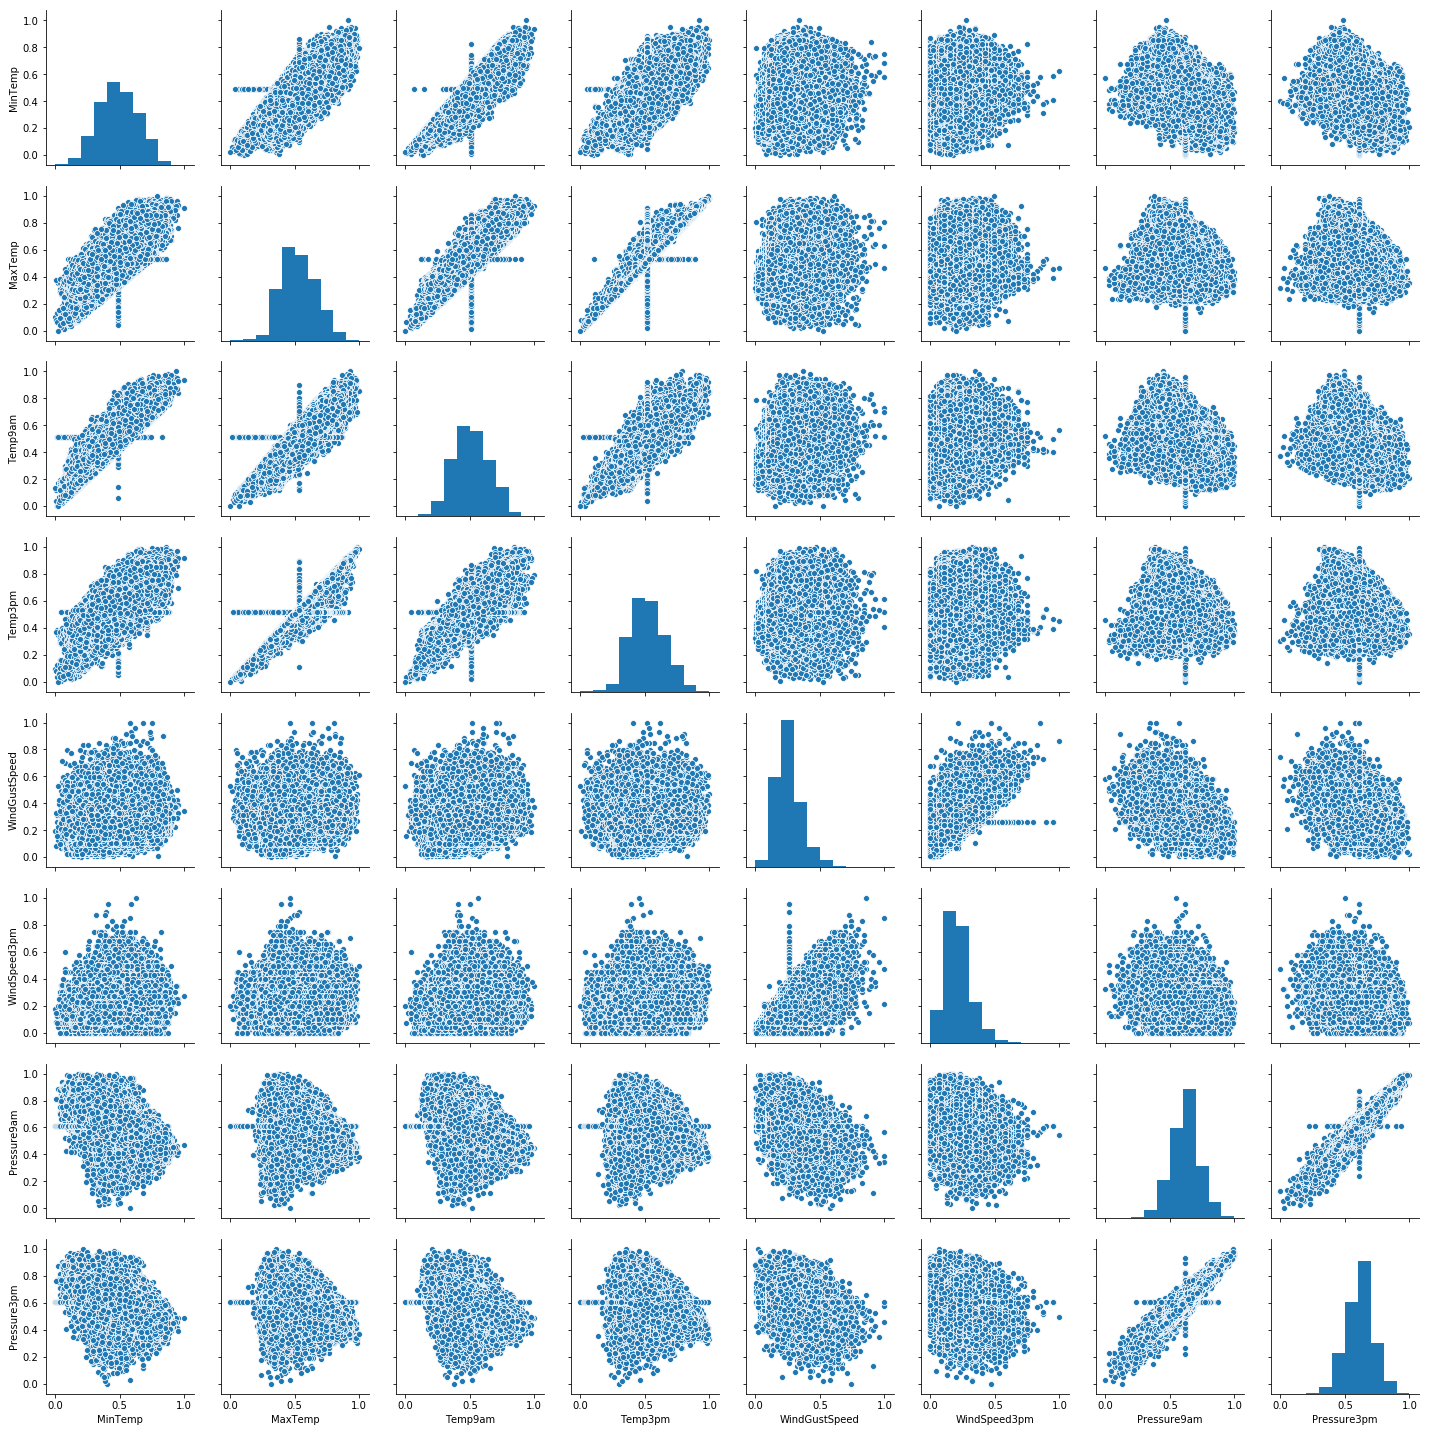

<Figure size 864x864 with 0 Axes>

In [28]:
sb.pairplot(X[corr_vars], kind = 'scatter', diag_kind = 'hist', palette = 'Rainbow')

plt.figure(figsize = (12, 12))
plt.show

In [27]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
    
X = NormalizeData(X)
Y = NormalizeData(Y)

In [29]:
X_train, X_validation, y_train, y_validation  = train_test_split(X, Y, test_size = 0.2, random_state = 20)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 20)

# **Method 1) Naive Bayes**


Naive Bayes<sup>[2]</sup> methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

NB algorithm can be used with different types of distributions. In this project I took in consideration Gaussian distribution and Bernoulli distribution.


In [40]:
# Gaussian distribution
gnb = GaussianNB()

# Bernoulli distribution
bnb = BernoulliNB()

In [41]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

Using Naive Bayes algorithm, the best accuracy on this dataset is 77.3%, obtained using Bernoulli distribution. 

Accuracy using Gaussian distribution: 0.7148696760581953


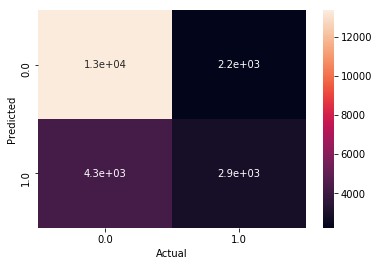

In [46]:
predicted_labels_gaussian = gnb.fit(X_train,y_train).predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels_gaussian)
print("Accuracy using Gaussian distribution: %s" % accuracy)

data = {'y_Actual': y_test, 'y_Predicted': predicted_labels_gaussian}

df = pd.DataFrame(data, columns = ['y_Predicted','y_Actual'])
confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames = ['Actual'])

sb.heatmap(confusion_matrix, annot=True)

Accuracy using Bernoulli distribution: 0.7665597116610259


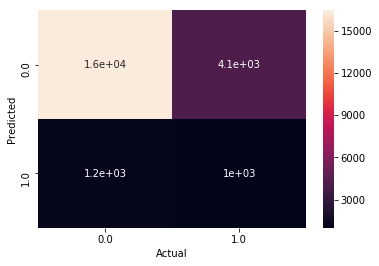

In [47]:
predicted_labels_bernoulli = bnb.fit(X_train,y_train).predict(X_test)
accuracy = accuracy_score(y_test, predicted_labels_bernoulli)
print("Accuracy using Bernoulli distribution: %s" % accuracy)

data = {'y_Actual': y_test, 'y_Predicted': predicted_labels_bernoulli}

df = pd.DataFrame(data, columns = ['y_Predicted','y_Actual'])
confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames = ['Actual'])

sb.heatmap(confusion_matrix, annot=True)

# **Method 2) k-nn CLASSIFICATION**

In [48]:
f1_list=[]
k_list=[]
for k in range(1,40):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_validation)
    f=f1_score(y_validation,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)  

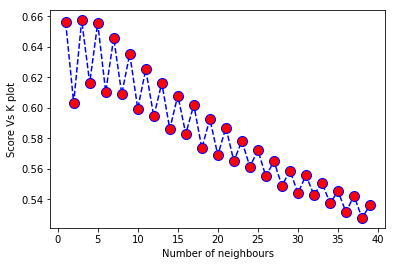

In [49]:
# Plot the data
plt.plot(k_list, f1_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Number of neighbours')
plt.ylabel('Score Vs K plot')

# Show the plot
plt.show()

In [50]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 3  with F1-Score= 0.6574410649769891


In [51]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print("Accuracy={}%".format((sum(y_test==pred)/y_test.shape[0])*100))

Accuracy=79.58771043031075%


In [52]:
# Step 7: Evaluate the predictions
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     17603
         1.0       0.57      0.38      0.46      5148

   micro avg       0.80      0.80      0.80     22751
   macro avg       0.70      0.65      0.67     22751
weighted avg       0.78      0.80      0.78     22751



In [54]:
# Confusion Matrix
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

[[16161  1442]
 [ 3202  1946]]
TP - True Negative 16161
FP - False Positive 1442
FN - False Negative 3202
TP - True Positive 1946
Accuracy Rate: 0.7958771043031075
Misclassification Rate: 0.20412289569689243


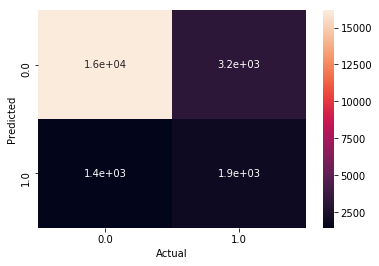

In [55]:
data = {'y_Actual': y_test, 'y_Predicted': pred}

df = pd.DataFrame(data, columns = ['y_Predicted','y_Actual'])
confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames = ['Actual'])

sb.heatmap(confusion_matrix, annot=True)

# **Method 3) SVM**


Support vector machines algorithm is based on the separation of the data through a clear gap as wide as possible. Using the regularization parameter (C) we can set how wide to be the gab. A bigger C will generate a smaller gap and a bigger chance to classify the new objects correctly. To aproximate the best value for C we will try different values and get the one that generated the bigger precision.

In [31]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [32]:
time_format = '%H:%M:%S'

def svm_algorithm(C_list=[1]):
  cs = []
  accuracies = []
  for c in C_list:
      start = datetime.now().strftime(time_format)
      print("started with C = %d at %s" % (c, start))

      svm_classifier = svm.SVC(C=c, gamma='auto')
      svm_classifier.fit(X_train,y_train)
      
      predicted_labels = svm_classifier.predict(X_validation)
      
      accuracy = accuracy_score(y_validation, predicted_labels)
      print("Accuracy: %s" % str(accuracy))
      
      cs.append(c)
      accuracies.append(accuracy)

      end = datetime.now().strftime(time_format)
      tdelta = datetime.strptime(end, time_format) - datetime.strptime(start, time_format)
      print("For C = %d, it took: %s (h:mm:ss)" % (c, tdelta))

  return (cs, accuracies)   

started with C = 0 at 22:22:36
Accuracy: 0.8136345655136038
For C = 0, it took: 0:17:00 (h:mm:ss)
started with C = 0 at 22:39:36
Accuracy: 0.834776493340952
For C = 0, it took: 0:10:44 (h:mm:ss)
started with C = 1 at 22:50:20
Accuracy: 0.8364907037053316
For C = 1, it took: 0:10:38 (h:mm:ss)
started with C = 2 at 23:00:58
Accuracy: 0.8385125928530615
For C = 2, it took: 0:10:27 (h:mm:ss)
started with C = 3 at 23:11:25
Accuracy: 0.8388642257483188
For C = 3, it took: 0:10:28 (h:mm:ss)
started with C = 4 at 23:21:53
Accuracy: 0.838644455188783
For C = 4, it took: 0:10:21 (h:mm:ss)
started with C = 5 at 23:32:14
Accuracy: 0.839435629203112
For C = 5, it took: 0:10:29 (h:mm:ss)
started with C = 10 at 23:42:43
Accuracy: 0.8406223902246055
For C = 10, it took: 0:10:35 (h:mm:ss)
started with C = 20 at 23:53:18
Accuracy: 0.8408861148960485
For C = 20, it took: -1 day, 0:11:23 (h:mm:ss)
started with C = 50 at 00:04:41
Accuracy: 0.8419849676937278
For C = 50, it took: 0:13:34 (h:mm:ss)


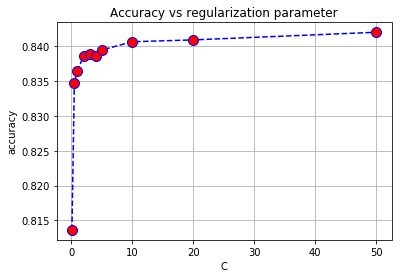

In [33]:
(cs, accuracies) = svm_algorithm([0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50])

fig, ax = plt.subplots()
ax.plot(cs, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

ax.set(xlabel='C', ylabel='accuracy',
       title='Accuracy vs regularization parameter')
ax.grid()

# fig.savefig("test.png")
plt.show()

After the first trial we obtained the following precisions:<br>
C = 0.1 Accuracy = 0.8136345655136038 <br>
C = 0.5 Accuracy = 0.834776493340952 <br>
C = 1   Accuracy = 0.8364907037053316 <br>
C = 2   Accuracy = 0.8385125928530615 <br>
C = 3   Accuracy = 0.8388642257483188 <br>
C = 4   Accuracy = 0.838644455188783 <br>
C = 5   Accuracy = 0.839435629203112 <br>
C = 10  Accuracy = 0.8406223902246055 <br>
C = 20  Accuracy = 0.8408861148960485 <br>
C = 50  Accuracy = 0.8419849676937278 <br>

We observed that the ideal value vor C is around 1, so we will test the close values, between 0.8 and 1.3. 

started with C = 0 at 00:18:15
Accuracy: 0.8362269790338887
For C = 0, it took: 0:10:40 (h:mm:ss)
started with C = 0 at 00:28:55
Accuracy: 0.8361390708100743
For C = 0, it took: 0:10:43 (h:mm:ss)
started with C = 1 at 00:39:38
Accuracy: 0.8369741989363105
For C = 1, it took: 0:10:34 (h:mm:ss)
started with C = 1 at 00:50:12
Accuracy: 0.8369302448244034
For C = 1, it took: 0:10:35 (h:mm:ss)
started with C = 1 at 01:00:47
Accuracy: 0.8372379236077535
For C = 1, it took: 0:10:36 (h:mm:ss)


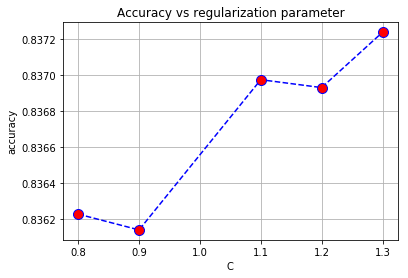

In [34]:
(cs, accuracies) = svm_algorithm([0.8, 0.9, 1.1, 1.2, 1.3])

fig, ax = plt.subplots()
ax.plot(cs, accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

ax.set(xlabel='C', ylabel='accuracy',
       title='Accuracy vs regularization parameter')
ax.grid()

# fig.savefig("test.png")
plt.show()

We obtained the following accuracies:<br>

C = 0.8 Accuracy = 0.8362269790338887 <br>
C = 0.9 Accuracy = 0.8361390708100743 <br>
C = 1.1 Accuracy = 0.8369741989363105 <br>
C = 1.2 Accuracy = 0.8369302448244034 <br>
C = 1.3 Accuracy = 0.8372379236077535 <br>

The best precision that we got is 83.72% for C = 1.3.

In [35]:
svm_classifier = svm.SVC(C = 1.2, gamma = 'auto')
svm_classifier.fit(X_train, y_train)

predicted_labels = svm_classifier.predict(X_test)

In [62]:
acc_svm = accuracy_score(y_test, predicted_labels)
print("SVM accuracy:", acc_svm)

SVM accuracy: 0.8369302448244034


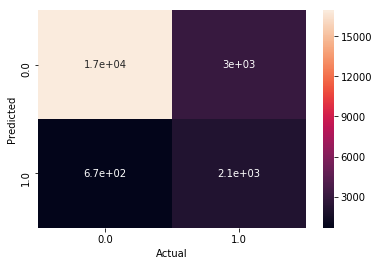

In [38]:
data = {'y_Actual': y_test, 'y_Predicted': predicted_labels}

df = pd.DataFrame(data, columns = ['y_Predicted','y_Actual'])
confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames = ['Actual'])

sb.heatmap(confusion_matrix, annot=True)

# **Method 4) Random Forest**


In [77]:
random_forest_classifier = RandomForestClassifier(max_depth=10, random_state=0)
random_forest_classifier.fit(X_train, y_train)

C:\Users\Irikos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
prediction_random_forest = random_forest_classifier.predict(X_test)
acc_random_forest = accuracy_score(y_test, prediction_random_forest)
print("Random Forest accuracy:", acc_random_forest)

Random Forest accuracy: 0.8392598127554832


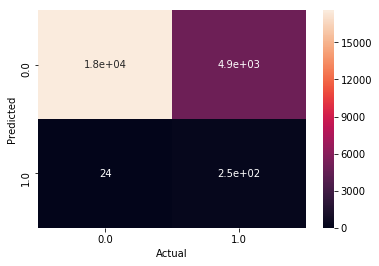

In [66]:
data = {'y_Actual': y_test, 'y_Predicted': prediction_random_forest}

df = pd.DataFrame(data, columns = ['y_Predicted','y_Actual'])
confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames = ['Actual'])

sb.heatmap(confusion_matrix, annot=True)

# <h1> Conclusion </h1>
<p> Our target was to predict if tomorrow is going to rain or not in Australia. Given the recent Australian fires tragedy, this prediction is more important than ever. In our quest to get a satisfying accuracy, we tried SVM, Naive Bayes and KNN. 
We got the following results:
    <ol>
<li>	83.92 with Random Forest with a depth of 10</li>
<li>	83.69 with SVM, for C = 1.2. At first, we tried C = (1, 2, 3, 4, 5, 10, 20, 30, 40, 50). After noticing that the best value was somewhere in the vicinity of 1, we tried different values until we reached our optimal 1.2</li>
<li>	79.58 with KNN K = 3. In order to reach K = 3 we tried up to K = 40 due to the fact that in simpler version of the dataset, the optimal K was 17. Thus, we wanted to make sure that we search for it thoroughly </li>
    <li>	Our least optimal solution is Naive Bayes:
            <ul>
                <li>a.	71.48 with the Gaussian Distribution </li>
                <li>b.	76.65 with the Bernoulli Distribution </li>
            </ul>
        </li>
    </ol>
In our journey of doing this project, we realized how important data preparation is. At first, we removed all the NaN rows and got a very different optimal parameter. After that, we put in more effort to thoroughly clean and understand the dataset, arriving to our current values. 
 </p> 

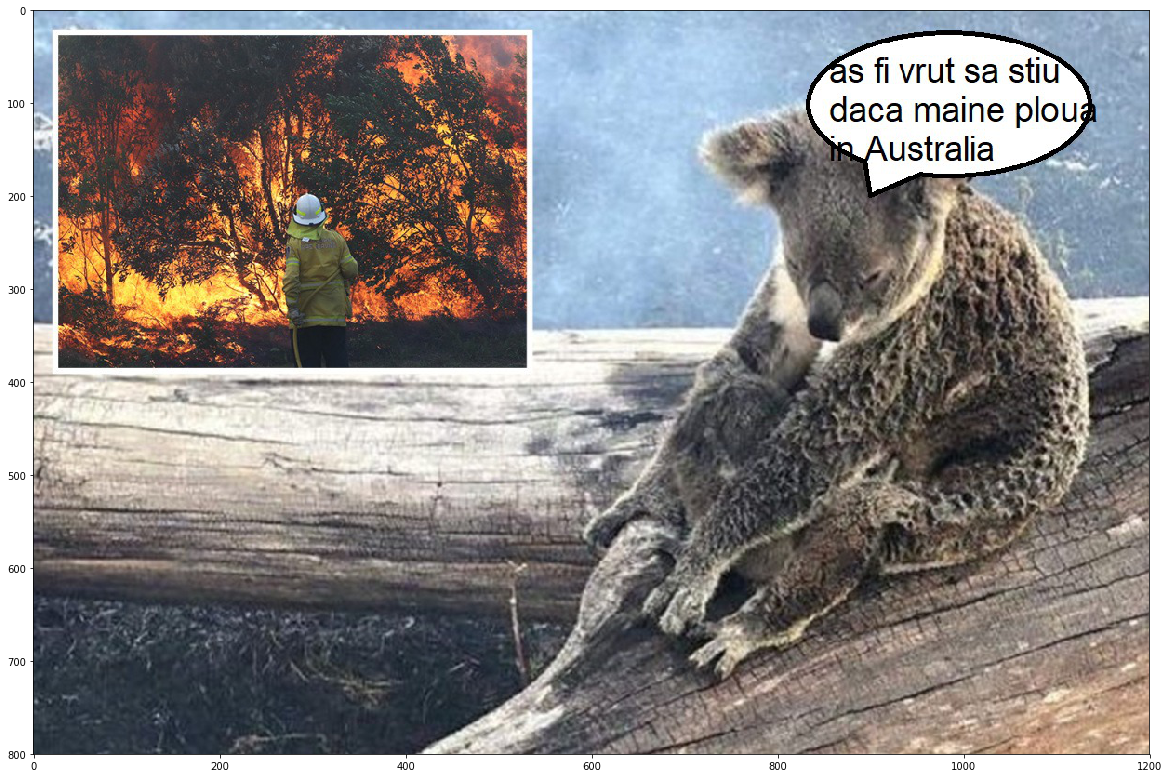

In [39]:
img = mpimg.imread('koala.jfif')
plt.figure(figsize = (20, 20))
imgplot = plt.imshow(img)

# <h1>References </h1>
1. A Comprehensive guide on handling Missing Values by Mallidi Akhil Reddy https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1